In [24]:
%%pyspark
df = spark.read.load('abfss://files@datalakefv41bzh.dfs.core.windows.net/data/PDCP_bearer.csv', format='csv'
## If header exists uncomment line below
, header=True
)
display(df.limit(10))

StatementMeta(sparkfv41bzh, 4, 2, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, ce8d0201-44c8-44f4-bc09-c16b5fddadaf)

In [25]:
df.count()

StatementMeta(sparkfv41bzh, 4, 3, Finished, Available, Finished)

28783

In [26]:
df.printSchema()


StatementMeta(sparkfv41bzh, 4, 4, Finished, Available, Finished)

root
 |-- tstamp: string (nullable = true)
 |-- ngran_node: string (nullable = true)
 |-- mcc: string (nullable = true)
 |-- mnc: string (nullable = true)
 |-- mnc_digit_len: string (nullable = true)
 |-- nb_id: string (nullable = true)
 |-- cu_du_id: string (nullable = true)
 |-- txpdu_pkts: string (nullable = true)
 |-- txpdu_bytes: string (nullable = true)
 |-- txpdu_sn: string (nullable = true)
 |-- rxpdu_pkts: string (nullable = true)
 |-- rxpdu_bytes: string (nullable = true)
 |-- rxpdu_sn: string (nullable = true)
 |-- rxpdu_oo_pkts: string (nullable = true)
 |-- rxpdu_oo_bytes: string (nullable = true)
 |-- rxpdu_dd_pkts: string (nullable = true)
 |-- rxpdu_dd_bytes: string (nullable = true)
 |-- rxpdu_ro_count: string (nullable = true)
 |-- txsdu_pkts: string (nullable = true)
 |-- txsdu_bytes: string (nullable = true)
 |-- rxsdu_pkts: string (nullable = true)
 |-- rxsdu_bytes: string (nullable = true)
 |-- rnti: string (nullable = true)
 |-- mode: string (nullable = true)
 |-

In [27]:
# PDU (Packet Data Unit) Transmission Metrics
# These metrics track packets and bytes at the PDU layer, which is responsible for reliable transmission and reception of data.

# txpdu_pkts (string): Number of transmitted PDUs (packets).
# txpdu_bytes (string): Total bytes transmitted via PDUs.
# txpdu_sn (string): Transmission PDU sequence number.
# rxpdu_pkts (string): Number of received PDUs (packets).
# rxpdu_bytes (string): Total bytes received via PDUs.
# rxpdu_sn (string): Received PDU sequence number.

StatementMeta(sparkfv41bzh, 4, 5, Finished, Available, Finished)

In [28]:
# PDU Errors & Out-of-Order Packets
# These fields monitor transmission errors and out-of-sequence packets.

# rxpdu_oo_pkts (string): Count of out-of-order PDUs received.
# rxpdu_oo_bytes (string): Bytes affected by out-of-order reception.
# rxpdu_dd_pkts (string): Count of duplicate PDUs received.
# rxpdu_dd_bytes (string): Bytes affected by duplicate reception.
# rxpdu_ro_count (string): Count of retransmitted PDUs due to errors.

StatementMeta(sparkfv41bzh, 4, 6, Finished, Available, Finished)

In [29]:
# SDU (Service Data Unit) Transmission Metrics
# The SDU layer is the data payload from higher layers (e.g., user data, control messages).

# txsdu_pkts (string): Number of transmitted SDUs (packets).
# txsdu_bytes (string): Total bytes transmitted via SDUs.
# rxsdu_pkts (string): Number of received SDUs (packets).
# rxsdu_bytes (string): Total bytes received via SDUs.

StatementMeta(sparkfv41bzh, 4, 7, Finished, Available, Finished)

In [30]:
# Count per mode
df.groupBy("mode").count().orderBy("count").show()


StatementMeta(sparkfv41bzh, 4, 8, Finished, Available, Finished)

+----+-----+
|mode|count|
+----+-----+
|   2| 7568|
|   0| 9927|
|   1|11288|
+----+-----+



In [31]:
from pyspark.sql.functions import col

# Convert relevant columns to numeric types
df_num = df.withColumn("txpdu_pkts", col("txpdu_pkts").cast("int")) \
       .withColumn("txpdu_bytes", col("txpdu_bytes").cast("int")) \
       .withColumn("rxpdu_pkts", col("rxpdu_pkts").cast("int")) \
       .withColumn("rxpdu_bytes", col("rxpdu_bytes").cast("int")) \
       .withColumn("rxpdu_oo_pkts", col("rxpdu_oo_pkts").cast("int")) \
       .withColumn("rxpdu_oo_bytes", col("rxpdu_oo_bytes").cast("int")) \
       .withColumn("rxpdu_dd_pkts", col("rxpdu_dd_pkts").cast("int")) \
       .withColumn("rxpdu_dd_bytes", col("rxpdu_dd_bytes").cast("int")) \
       .withColumn("rxpdu_ro_count", col("rxpdu_ro_count").cast("int")) \
       .withColumn("txsdu_pkts", col("txsdu_pkts").cast("int")) \
       .withColumn("txsdu_bytes", col("txsdu_bytes").cast("int")) \
       .withColumn("rxsdu_pkts", col("rxsdu_pkts").cast("int")) \
       .withColumn("rxsdu_bytes", col("rxsdu_bytes").cast("int")) \
       .withColumn("rnti", col("rnti").cast("int")) \
       .withColumn("rbid", col("rbid").cast("int"))


StatementMeta(sparkfv41bzh, 4, 9, Finished, Available, Finished)

## PROTOCOL DATA UNIT (PDU) -- Transmission Metrics

In [ ]:
# PDU (Protocol Data Unit) Transmission Metrics
# These metrics track packets and bytes at the PDU layer, which is responsible for reliable transmission and reception of data.

# txpdu_pkts (string): Number of transmitted PDUs (packets).
# txpdu_bytes (string): Total bytes transmitted via PDUs.
# txpdu_sn (string): Transmission PDU sequence number.
# rxpdu_pkts (string): Number of received PDUs (packets).
# rxpdu_bytes (string): Total bytes received via PDUs.
# rxpdu_sn (string): Received PDU sequence number.

In [32]:
# PACKET DATA UNIT (PDU)
df_num.selectExpr(
    "SUM(txpdu_pkts) as total_txpdu_pkts",
    "SUM(rxpdu_pkts) as total_rxpdu_pkts",
    "AVG(txpdu_bytes / txpdu_pkts) as avg_txpdu_size",
    "AVG(rxpdu_bytes / rxpdu_pkts) as avg_rxpdu_size",
    "MAX(txpdu_pkts) as max_txpdu_pkts",
    "MAX(rxpdu_pkts) as max_rxpdu_pkts",
    "MIN(txpdu_pkts) as min_txpdu_pkts",
    "MIN(rxpdu_pkts) as min_rxpdu_pkts"
).show()


StatementMeta(sparkfv41bzh, 4, 10, Finished, Available, Finished)

+----------------+----------------+------------------+------------------+--------------+--------------+--------------+--------------+
|total_txpdu_pkts|total_rxpdu_pkts|    avg_txpdu_size|    avg_rxpdu_size|max_txpdu_pkts|max_rxpdu_pkts|min_txpdu_pkts|min_rxpdu_pkts|
+----------------+----------------+------------------+------------------+--------------+--------------+--------------+--------------+
|         7723256|         5576796|2.2412151745046685|3.2322435748182303|           678|           560|            22|             1|
+----------------+----------------+------------------+------------------+--------------+--------------+--------------+--------------+



Total data being transmitted in packets = 7723256

Total data being recieved in packets = 5576796

Average size of transmitted/received packet = 2.2412151745046685 // 3.2322435748182303

## PDU Errors & Out-of-Order Packets

In [ ]:
# PDU Errors & Out-of-Order Packets
# These fields monitor transmission errors and out-of-sequence packets.

# rxpdu_oo_pkts (string): Count of out-of-order PDUs received.
# rxpdu_oo_bytes (string): Bytes affected by out-of-order reception.
# rxpdu_dd_pkts (string): Count of duplicate PDUs received.
# rxpdu_dd_bytes (string): Bytes affected by duplicate reception.
# rxpdu_ro_count (string): Count of retransmitted PDUs due to errors.

In [33]:
df_num.selectExpr(
    "SUM(rxpdu_oo_pkts) as total_out_of_order_pkts",
    "SUM(rxpdu_dd_pkts) as total_duplicate_pkts",
    "SUM(rxpdu_ro_count) as total_retransmitted_pkts",
    "AVG(rxpdu_oo_pkts / rxpdu_pkts) as percent_out_of_order",
    "AVG(rxpdu_dd_pkts / rxpdu_pkts) as percent_duplicate"
).show()


StatementMeta(sparkfv41bzh, 4, 11, Finished, Available, Finished)

+-----------------------+--------------------+------------------------+--------------------+------------------+
|total_out_of_order_pkts|total_duplicate_pkts|total_retransmitted_pkts|percent_out_of_order| percent_duplicate|
+-----------------------+--------------------+------------------------+--------------------+------------------+
|               13690649|            14235951|                12343687|  23.765598309528144|25.394422846449938|
+-----------------------+--------------------+------------------------+--------------------+------------------+



StatementMeta(sparkfv41bzh, 4, 12, Finished, Available, Finished)

/tmp/ipykernel_22377/2787073040.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Value", data=result_df, palette="coolwarm")


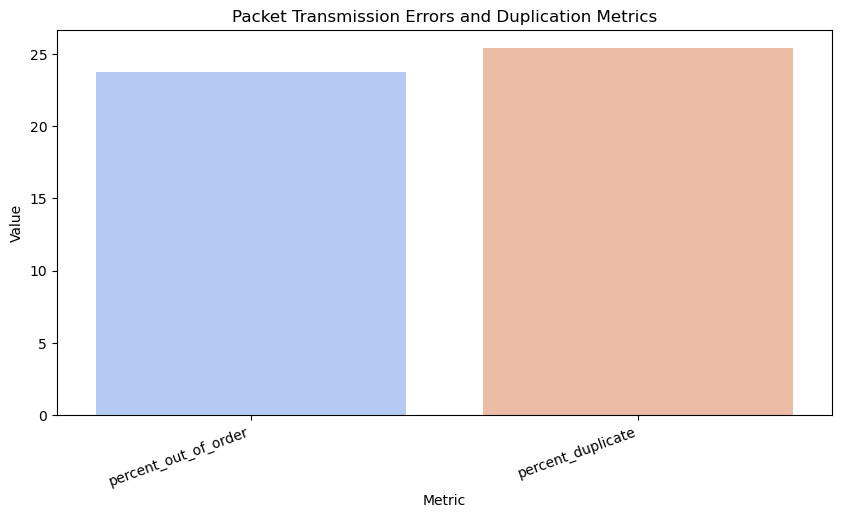

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

result_df = df_num.selectExpr(

    "AVG(rxpdu_oo_pkts / rxpdu_pkts) as percent_out_of_order",
    "AVG(rxpdu_dd_pkts / rxpdu_pkts) as percent_duplicate"
).toPandas()  

result_df = result_df.T.reset_index()
result_df.columns = ["Metric", "Value"]

plt.figure(figsize=(10, 5))
sns.barplot(x="Metric", y="Value", data=result_df, palette="coolwarm")

plt.xticks(rotation=20, ha="right")

plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Packet Transmission Errors and Duplication Metrics")

plt.show()


## SDU (Service Data Unit) Transmission Metrics

In [ ]:
# SDU (Service Data Unit) Transmission Metrics
# The SDU layer is the data payload from higher layers (e.g., user data, control messages).

# txsdu_pkts (string): Number of transmitted SDUs (packets).
# txsdu_bytes (string): Total bytes transmitted via SDUs.
# rxsdu_pkts (string): Number of received SDUs (packets).
# rxsdu_bytes (string): Total bytes received via SDUs.

In [35]:
df.selectExpr(
    "SUM(txsdu_pkts) as total_tx_sdu_pkts",
    "SUM(rxsdu_pkts) as total_rx_sdu_pkts",
    "AVG(txsdu_bytes / txsdu_pkts) as avg_tx_sdu_size",
    "AVG(rxsdu_bytes / rxsdu_pkts) as avg_rx_sdu_size"
).show()


StatementMeta(sparkfv41bzh, 4, 13, Finished, Available, Finished)

+-----------------+-----------------+-----------------+-----------------+
|total_tx_sdu_pkts|total_rx_sdu_pkts|  avg_tx_sdu_size|  avg_rx_sdu_size|
+-----------------+-----------------+-----------------+-----------------+
|        5829881.0|        6821892.0|5.398630926751707|4.020215118675639|
+-----------------+-----------------+-----------------+-----------------+



StatementMeta(sparkfv41bzh, 4, 21, Finished, Available, Finished)

/tmp/ipykernel_22377/2739799005.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Value", data=result_df, palette="coolwarm")


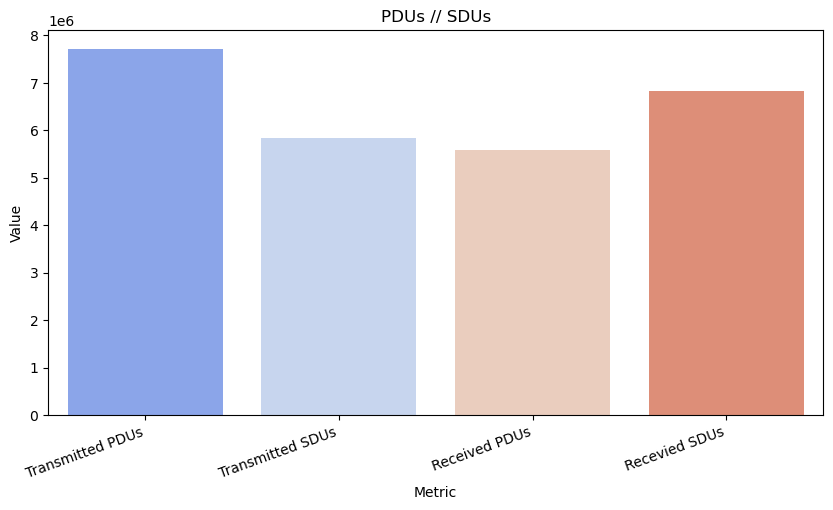

In [43]:
result_df = df.selectExpr(
    "SUM(txpdu_pkts) as total_txpdu_pkts",
    "SUM(txsdu_pkts) as total_tx_sdu_pkts",

    "SUM(rxpdu_pkts) as total_rxpdu_pkts",
    "SUM(rxsdu_pkts) as total_rx_sdu_pkts",
).toPandas()  

result_df = result_df.T.reset_index()
result_df.columns = ["Metric", "Value"]

# Rename metrics for better readability
rename_dict = {
    "total_txpdu_pkts": "Transmitted PDUs",
    "total_tx_sdu_pkts": "Transmitted SDUs",
    "total_rxpdu_pkts": "Received PDUs",
    "total_rx_sdu_pkts": "Recevied SDUs"
}

result_df["Metric"] = result_df["Metric"].replace(rename_dict)

plt.figure(figsize=(10, 5))
sns.barplot(x="Metric", y="Value", data=result_df, palette="coolwarm")

plt.xticks(rotation=20, ha="right")

plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("PDUs // SDUs")

plt.show()

## Radio Network analysis

**Number of Unique Users (rnti)**<br>
**Number of Bearers in Use (rbid)**

In [47]:
from pyspark.sql.functions import countDistinct

# Unique Users
df.select(countDistinct("rnti").alias("num_unique_users")).show()

# unique RBIDs (Radio Bearers)
df.select(countDistinct("rbid").alias("num_unique_bearers")).show()

# Top 5 most active users (highest transmitted SDUs)
df_num.groupBy("rnti").sum("txsdu_pkts").orderBy(col("sum(txsdu_pkts)").desc()).limit(5).show()


StatementMeta(sparkfv41bzh, 4, 25, Finished, Available, Finished)

+----------------+
|num_unique_users|
+----------------+
|              33|
+----------------+

+------------------+
|num_unique_bearers|
+------------------+
|                11|
+------------------+

+----+---------------+
|rnti|sum(txsdu_pkts)|
+----+---------------+
| 712|         706000|
| 276|         609000|
| 342|         450822|
| 926|         389207|
| 388|         382743|
+----+---------------+



StatementMeta(sparkfv41bzh, 4, 41, Finished, Available, Finished)

/tmp/ipykernel_22377/2215007166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rnti", y="SDUs transmitted", data=m_act, palette="coolwarm")


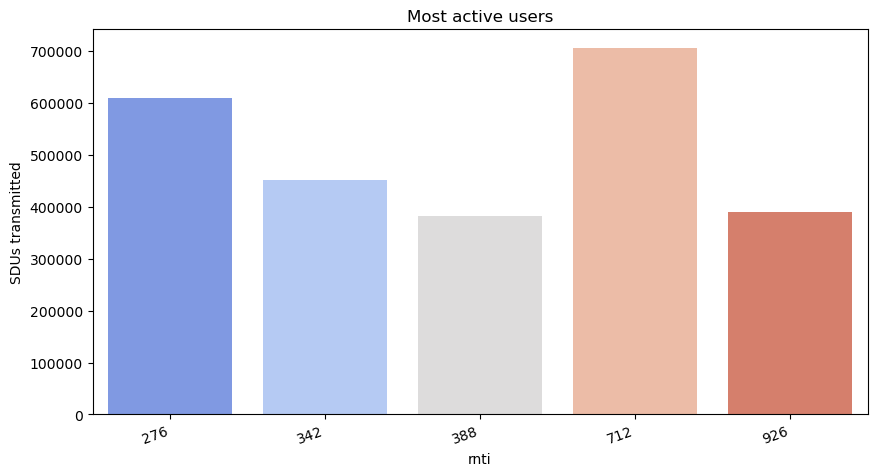

In [63]:
m_act=df_num.groupBy("rnti").sum("txsdu_pkts").orderBy(col("sum(txsdu_pkts)").desc()).limit(5)

m_act=m_act.toPandas()  

# m_act = m_act.T.reset_index()
m_act.columns = ["rnti", "SDUs transmitted"]

plt.figure(figsize=(10, 5))
sns.barplot(x="rnti", y="SDUs transmitted", data=m_act, palette="coolwarm")

# Annotating each point with its count value
# for i, row in m_act.iterrows():
#     plt.text(row["rnti"], row["SDUs transmitted"], str(row["SDUs transmitted"]), fontsize=9, ha='right', color='blue')


plt.xticks(rotation=20, ha="right")

plt.xlabel("rnti")
plt.ylabel("SDUs transmitted")
plt.title("Most active users")

plt.show()

In [65]:
# Compute correlation between retransmissions and errors
correlations = df_num.stat.corr("rxpdu_ro_count", "rxpdu_oo_pkts")
print(f"Correlation between retransmissions and out-of-order packets: {correlations}")

# Compute correlation between SDU size and retransmission count
correlations2 = df_num.stat.corr("txsdu_bytes", "rxpdu_ro_count")
print(f"Correlation between SDU size and retransmissions: {correlations2}")


StatementMeta(sparkfv41bzh, 4, 43, Finished, Available, Finished)

Correlation between retransmissions and out-of-order packets: 0.3069725887438913
Correlation between SDU size and retransmissions: -0.10497871040301827


This suggests that as out-of-order packets increase, the number of retransmissions also tends to increase.<br>
A positive correlation of 0.31 is not very strong but indicates some level of dependency